This image is: <class 'numpy.ndarray'> with dimensions: (1701, 2572, 3)


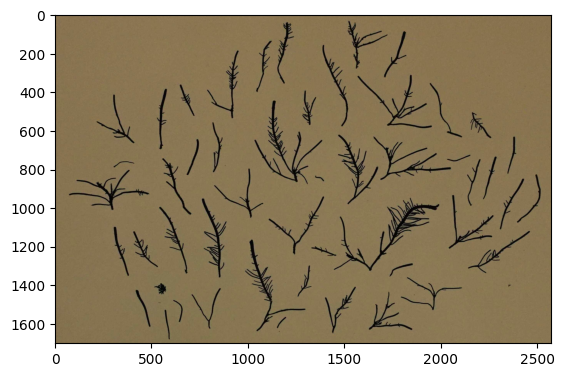

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# Pick one of the cropped images
image = cv2.imread('./cropped_photos/Lithothrix.aspergillum_SC_P_SA_8Mar2024_3_cropped.jpg')
# image = cv2.imread('./cropped_photos/Laurencia.pacifica_CS_P_19Feb2024_1_cropped.png')
# image = cv2.imread('./cropped_photos/Laurencia.pacifica_CS_SA_19Feb2024_1_cropped.png')
# image = cv2.imread('./cropped_photos/Plocamium.pacificum_LC_P_SA_26Jan2024_2_cropped.jpg')

print('This image is:', type(image), 
      'with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

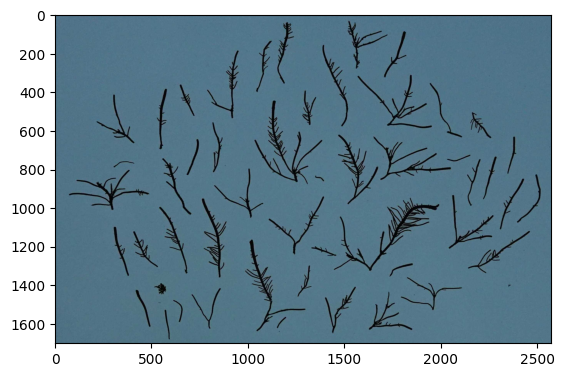

In [27]:
# Convert image to RGB, it will now appear as expected
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [28]:
# Create the range of colors that you want to *filter out*
# Darkest blue for background
lower_blue = np.array([40,50,80])
# Lightest blue for background
upper_blue = np.array([255,255,255])

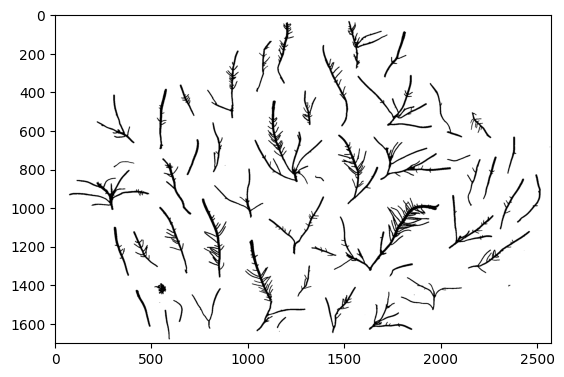

In [29]:
# The mask turns everything in between the upper/lower bounds to white
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
# The cmap parameter applies a grayscale to the pixels that don't fit
# into the mask's range
plt.imshow(mask, cmap='gray')

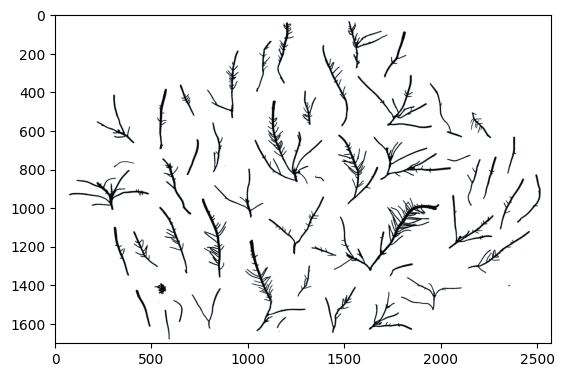

In [30]:
# Make a copy of the original image and apply the mask to it. 
# You can choose what color to set the background to using the second line
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [255, 255, 255]
plt.imshow(masked_image)

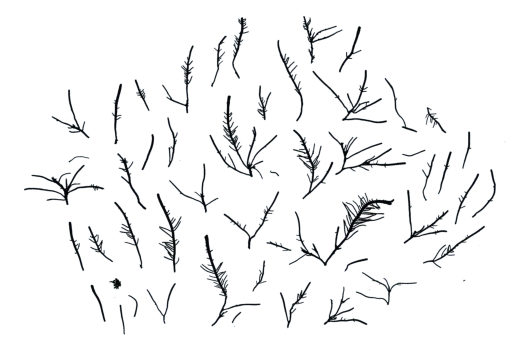

In [31]:
# Show Converted Image

# Set plot settings
# Selecting the axis-X making the bottom and top axes False. 
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
  
# Selecting the axis-Y making the right and left axes False 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
  
# Iterating over all the axes in the figure 
# and make the Spines Visibility as False 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

plt.imshow(masked_image)

In [32]:
# count_bw_pixels: Takes in a black/white image as numpy array and counts the black or white pixels
def count_bw_pixels(img, color):
    count = 0
    if color == 'black':
        for row in img:
            for col in row:
                if col[0] != 255 and col[1] != 255 and col[2] != 255:
                    count = count + 1
    elif color == 'white':
        for row in img:
            for col in row:
                if col[0] == 255 and col[1] == 255 and col[2] == 255:
                    count = count + 1

    return count

In [34]:
# Count black/white pixels
black_pix = count_bw_pixels(masked_image, 'black')
print("Non-White Pixels:", black_pix)
white_pix = count_bw_pixels(masked_image, 'white')
print("White Pixels:", white_pix)

Non-White Pixels: 230878
White Pixels: 4144094


Check Given Black/White Image

In [35]:
image = cv2.imread('./black-white_photos/BW - Lithothrix.aspergillum_SC_P_SA_8Mar2024_3.jpg')

In [36]:
# Count black/white pixels
black_pix = count_bw_pixels(image, 'black')
print("Non-White Pixels:", black_pix)
white_pix = count_bw_pixels(image, 'white')
print("White Pixels:", white_pix)

Non-White Pixels: 9884076
White Pixels: 96852
